## Installing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression

In [2]:
loan=pd.read_csv("Classification_Loan_Data.csv")

In [3]:
loan.shape

(614, 13)

In [4]:
loan.isna().sum(axis=0)

ID                            0
Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement      22
Loan_Amount_Term             14
Credit_History               50
Gender                       13
Is_Married                    3
No_of_Dependents             15
Level_of_Education            0
IS_Self_Employed             32
Area_of_Property              0
Loan_Status                   0
dtype: int64

## The provided dataset has missing values in many columns. 
## Some of these columns have categorical values while some have continuous.
## Missing values can be either imputed or their row/column entries can be deleted. 
## While replacing missing values, there is a chance that we may end up building biased model

## First, we will have a look at categorical variables IS_Self_Employed,Loan_Amount_Term, Credit_History and No_of_Dependents

In [5]:
loan.IS_Self_Employed.value_counts()

No     500
Yes     82
Name: IS_Self_Employed, dtype: int64

In [6]:
loan.IS_Self_Employed.replace(('Yes','No'),(1,0),inplace=True)

In [7]:
loan['IS_Self_Employed'].fillna(loan['IS_Self_Employed'].mode()[0].astype(int), inplace=True)

In [8]:
loan.isna().sum(axis=0)

ID                            0
Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement      22
Loan_Amount_Term             14
Credit_History               50
Gender                       13
Is_Married                    3
No_of_Dependents             15
Level_of_Education            0
IS_Self_Employed              0
Area_of_Property              0
Loan_Status                   0
dtype: int64

In [9]:
loan.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0].astype(int),inplace=True)

In [11]:
loan.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [12]:
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0].astype(int), inplace=True)

In [13]:
loan.No_of_Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: No_of_Dependents, dtype: int64

In [14]:
loan.No_of_Dependents.replace(('3+'),(3),inplace=True)

In [15]:
loan.No_of_Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: No_of_Dependents, dtype: int64

In [16]:
loan['No_of_Dependents'].fillna(loan['No_of_Dependents'].mode()[0],inplace=True)

In [17]:
loan.isna().sum(axis=0)

ID                            0
Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement      22
Loan_Amount_Term              0
Credit_History                0
Gender                       13
Is_Married                    3
No_of_Dependents              0
Level_of_Education            0
IS_Self_Employed              0
Area_of_Property              0
Loan_Status                   0
dtype: int64

In [18]:
loan.head(5)

,ID,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Gender,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Area_of_Property,Loan_Status
0,1,5849,0.0,NaN,360.0,1.0,Male,No,0,Graduate,0.0,Urban,Y
1,2,4583,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,0.0,Rural,N
2,3,3000,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,1.0,Urban,Y
3,4,2583,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,0.0,Urban,Y
4,5,6000,0.0,141.0,360.0,1.0,Male,No,0,Graduate,0.0,Urban,Y


## All of the four categorical values are replaced by their mode as the data was highly skewed.

In [19]:
loan.isna().sum(axis=0)

ID                            0
Income_of_Applicant           0
Income_of_Joint_Applicant     0
Loan_Amount_Requirement      22
Loan_Amount_Term              0
Credit_History                0
Gender                       13
Is_Married                    3
No_of_Dependents              0
Level_of_Education            0
IS_Self_Employed              0
Area_of_Property              0
Loan_Status                   0
dtype: int64

## Now, we are left with three columns which have missing values, Loan_Amount_Requirement, Gender and Is_Married

## Keeping Gender criteria in our model can introduce unfairness as loan status of male and female with same characteristics can turn out to be different. This will not be accepted by regulating authorities.


In [20]:
loan.drop('ID',inplace=True,axis=1)

In [21]:
loan.drop('Gender',inplace=True,axis=1)

## Now, we are left with variable Loan_Amount_Requirement and IS_Married with missing values

(array([ 2.,  7., 14., 17., 32., 32., 68., 74., 88., 48., 52., 22., 44.,
        14., 11.,  6.,  6.,  7.,  9.,  5.,  4.,  5.,  3.,  1.,  2.,  1.,
         3.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  4.,  3.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  9.  ,  22.82,  36.64,  50.46,  64.28,  78.1 ,  91.92, 105.74,
        119.56, 133.38, 147.2 , 161.02, 174.84, 188.66, 202.48, 216.3 ,
        230.12, 243.94, 257.76, 271.58, 285.4 , 299.22, 313.04, 326.86,
        340.68, 354.5 , 368.32, 382.14, 395.96, 409.78, 423.6 , 437.42,
        451.24, 465.06, 478.88, 492.7 , 506.52, 520.34, 534.16, 547.98,
        561.8 , 575.62, 589.44, 603.26, 617.08, 630.9 , 644.72, 658.54,
        672.36, 686.18, 700.  ]),
 <BarContainer object of 50 artists>)

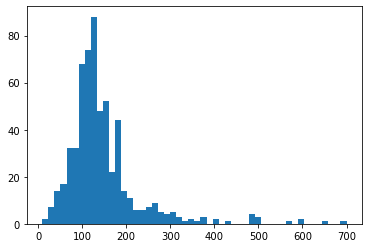

In [22]:
plt.hist(loan.Loan_Amount_Requirement, bins=50)

In [23]:
loan['Loan_Amount_Requirement'].median()

128.0

In [24]:
loan['Loan_Amount_Requirement'].fillna(loan['Loan_Amount_Requirement'].median(),inplace=True)

## As the data is skewed, it is better to use median for replacement instead of mean

## As Is_Married criteria has only 3 missing values, we can safely drop it, without loosing valueable information

In [25]:
loan.dropna(inplace=True,axis=0)

## After dealing with missing values, we now have to convert values in all columns to numbers so that we can run different models on it. 


In [26]:
loan.Is_Married.replace(('Yes','No'),(1,0),inplace=True)

In [27]:
loan.head(5)


,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Area_of_Property,Loan_Status
0,5849,0.0,128.0,360.0,1.0,0,0,Graduate,0.0,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,1,1,Graduate,0.0,Rural,N
2,3000,0.0,66.0,360.0,1.0,1,0,Graduate,1.0,Urban,Y
3,2583,2358.0,120.0,360.0,1.0,1,0,Not Graduate,0.0,Urban,Y
4,6000,0.0,141.0,360.0,1.0,0,0,Graduate,0.0,Urban,Y


In [28]:
loan.shape

(611, 11)

In [29]:
loan.Level_of_Education.replace(('Graduate','Not Graduate'),(1,0),inplace=True)

## One hot encoding area of property column

In [30]:
loan1=pd.get_dummies(loan, columns=['Area_of_Property'])

In [31]:
loan1

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Loan_Status,Area_of_Property_Rural,Area_of_Property_Semiurban,Area_of_Property_Urban
0,5849,0.0,128.0,360.0,1.0,0,0,1,0.0,Y,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0.0,N,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,1.0,Y,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0.0,Y,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,1,0.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,1,0.0,Y,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3,1,0.0,Y,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0.0,Y,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,2,1,0.0,Y,0,0,1


In [32]:
loan1.shape

(611, 13)

In [33]:
loan1.head(5)

,Income_of_Applicant,Income_of_Joint_Applicant,Loan_Amount_Requirement,Loan_Amount_Term,Credit_History,Is_Married,No_of_Dependents,Level_of_Education,IS_Self_Employed,Loan_Status,Area_of_Property_Rural,Area_of_Property_Semiurban,Area_of_Property_Urban
0,5849,0.0,128.0,360.0,1.0,0,0,1,0.0,Y,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0.0,N,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,1.0,Y,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0.0,Y,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,0,1,0.0,Y,0,0,1


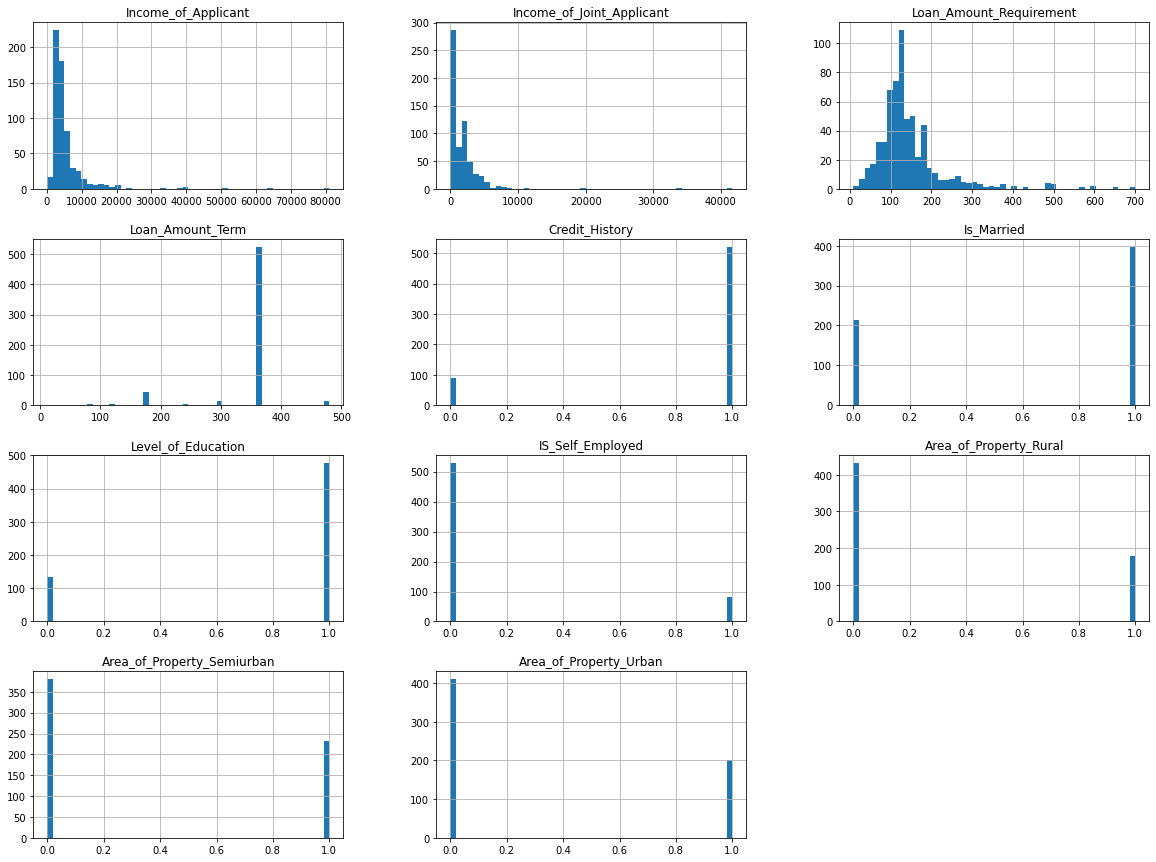

In [34]:
import matplotlib.pyplot as plt
loan1.hist(bins=50, figsize=(20,15))
plt.show()

## From above plots, we can infer that there are some applicants with very high income, we will not remove them as this situation is a reality and not by mistake

In [35]:
loan1.Loan_Status.value_counts()

Y    419
N    192
Name: Loan_Status, dtype: int64

In [36]:
loan1.Loan_Status.replace(('Y','N'),(1,0),inplace=True)

In [37]:
X=loan1.drop(['Loan_Status'],axis=1)
Y=loan1.Loan_Status

## As the dataset is imbalanced, we need to balance it. We can perform undersampling or oversampling. In case of undersampling there is a risk of loosing valueable information, so we will oversample using SMOTE.

In [38]:
oversample = SMOTE(random_state=101)
X, Y = oversample.fit_resample(X,Y)

In [39]:
Y.value_counts()

1    419
0    419
Name: Loan_Status, dtype: int64

## Dividing train test data in ratio 3:1

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=6)

In [41]:
Y_test.value_counts()

0    108
1    102
Name: Loan_Status, dtype: int64

## Applying Different ML models
## Logistic Regression

In [42]:
LR = LogisticRegression(solver='liblinear',max_iter=1000,C=2,penalty='l1')
LRmodel=LR.fit(X_train,Y_train)
y_pred=LRmodel.predict(X_test)


#print("Accuracy is:", accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       108
           1       0.76      0.94      0.84       102

    accuracy                           0.83       210
   macro avg       0.85      0.83      0.83       210
weighted avg       0.85      0.83      0.83       210



## Random Forest

In [43]:
RFC = RandomForestClassifier(random_state=100)
RFCmodel=RFC.fit(X_train,Y_train)
y_pred=RFCmodel.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       108
           1       0.80      0.94      0.86       102

    accuracy                           0.86       210
   macro avg       0.87      0.86      0.86       210
weighted avg       0.87      0.86      0.86       210



## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
NVB = GaussianNB()
NVBclf = NVB.fit(X_train,Y_train)
y_pred=NVBclf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65       108
           1       0.64      0.94      0.76       102

    accuracy                           0.72       210
   macro avg       0.77      0.73      0.71       210
weighted avg       0.78      0.72      0.71       210



## Support Vector Classifier

In [45]:
from sklearn.svm import SVC
SVC1 = GaussianNB()
SVC1clf = SVC1.fit(X_train,Y_train)
y_pred=SVC1clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65       108
           1       0.64      0.94      0.76       102

    accuracy                           0.72       210
   macro avg       0.77      0.73      0.71       210
weighted avg       0.78      0.72      0.71       210



## Decision Tree Classifier

In [46]:
DTC= DecisionTreeClassifier()
DTCmodel=DTC.fit(X_train,Y_train)
y_pred=DTCmodel.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       108
           1       0.80      0.85      0.82       102

    accuracy                           0.82       210
   macro avg       0.82      0.82      0.82       210
weighted avg       0.83      0.82      0.82       210



# It is observed that highest accuracy and F1 Scores is obtained in case of Random Forest. 
# Accuracy obtained = 86%